# Example usage for PV generation modeling
## Instructions
* To use the NSRDB download functions, you will need to modify the "settings.py" file to insert a valid NSRDB API key, which can be requested from https://developer.nrel.gov/signup/. Locations can be specified by passing latitude, longitude floats to pvvm.data.downloadNSRDBfile(), or by passing a string googlemaps query to pvvm.io.queryNSRDBfile().
* To use the googlemaps functionality, you will need to request a googlemaps API key (https://developers.google.com/maps/documentation/javascript/get-api-key) and insert it in the "settings.py" file.

In [1]:
### Standard imports
import pandas as pd
import numpy as np
import os, sys, site
import matplotlib.pyplot as plt
import matplotlib as mpl

from matplotlib.ticker import (
    AutoMinorLocator, MultipleLocator, AutoLocator, PercentFormatter)
pd.options.display.max_columns = 200
pd.options.display.max_rows = 15

%config InlineBackend.figure_format = 'retina'

### Import the package
### (Note: scriptpath should lead to folder above 'pvvm' folder)
# scriptpath = os.path.expanduser('~/path/to/folder/above/pvvm/')
scriptpath = os.path.expanduser('~/Dropbox/MITEI/Projects/REValueMap/Package/pvtos_FINAL')
site.addsitedir(scriptpath)
import pvvm

### Set plot defaults
pvvm.plots.plotparams()

In [3]:
# ## Check the keys
# pvvm.settings.apikeys

In [3]:
### Get file from NSRDB, using googlemaps query for location
dfsun, info, tz, elevation, filename = pvvm.io.queryNSRDBfile(
    'Chicago, IL', 2015, returnfilename=True)
dfsun.sample(3)

/Users/patrickbrown/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Year,Month,Day,Hour,Minute,GHI,DNI,DHI,Solar Zenith Angle,Temperature,Wind Speed
2015-01-27 09:30:00-06:00,2015,1,27,9,30,129,11,125,69.92,0,4.4
2015-02-08 11:30:00-06:00,2015,2,8,11,30,48,0,48,57.38,2,3.5
2015-12-01 01:00:00-06:00,2015,12,1,1,0,0,0,0,153.70,6,5.3


In [4]:
### See where it's saved (in your datapath folder)
print(filename)

/Users/patrickbrown/Desktop/pvvmtest1/Data/NSRDB/Chicago,_IL-2015.csv


In [5]:
### Set system parameters
pvsys = pvvm.model.PVsystem('fixed')

In [6]:
### See system parameters, with defaults
pvvm.model.PVsystem().__dict__

{'gentype': 'pv',
 'systemtype': 'track',
 'axis_tilt': 0,
 'axis_azimuth': 180,
 'max_angle': 60,
 'backtrack': True,
 'gcr': 0.3333333333333333,
 'dcac': 1.3,
 'loss_system': 0.14,
 'loss_inverter': 0.04,
 'n_ar': 1.3,
 'n_glass': 1.526,
 'tempcoeff': -0.004,
 'temp_model': 'open_rack_cell_polymerback',
 'albedo': 0.2,
 'et_method': 'nrel',
 'diffuse_model': 'reindl',
 'model_perez': 'allsitescomposite1990',
 'clip': True}

/Users/patrickbrown/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


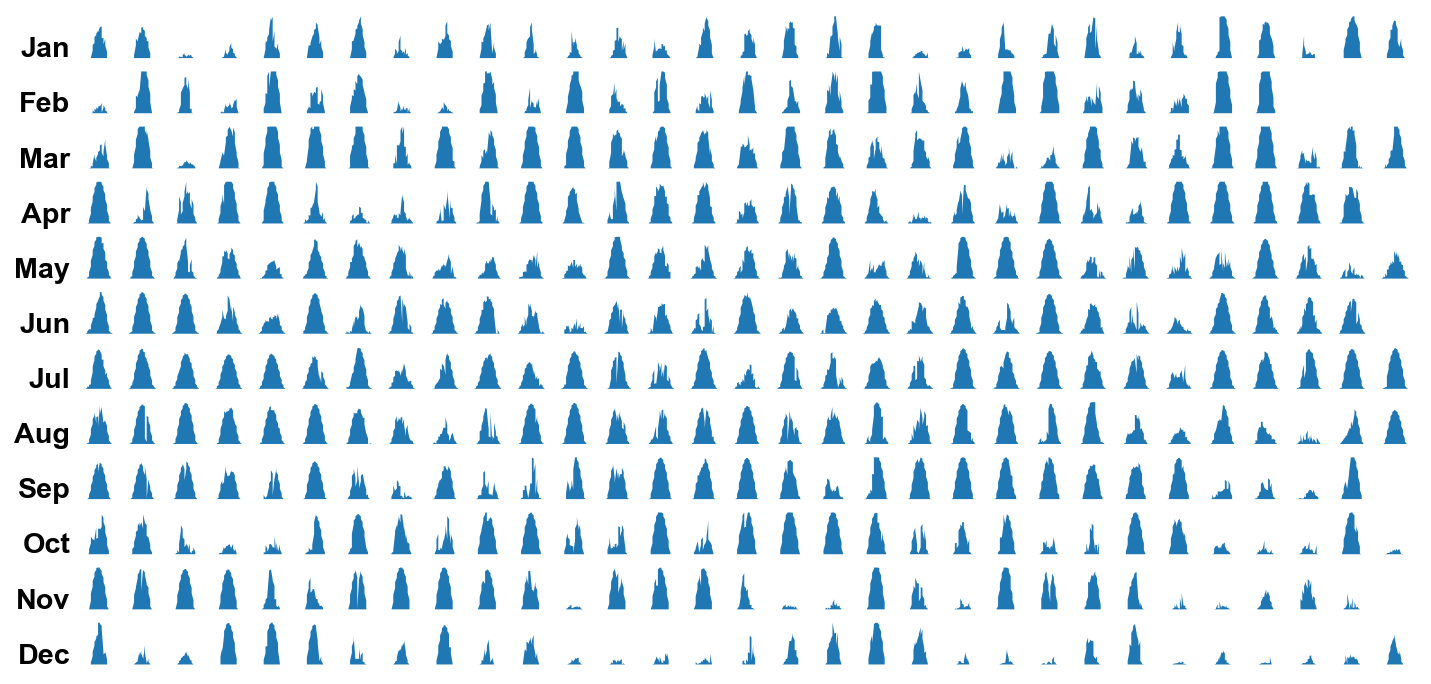

In [7]:
### Simulate output, taking file as input
df = pvsys.sim(filename, 2015)
plt.close()
f,ax = pvvm.plots.plotyearbymonth(df, normalize=False)
# ### Optional - show the upper and lower limits
# for i in range(12):
#     ax[i].axhline(0, c='k', lw=0.25)
#     ax[i].axhline(1000, c='k', lw=0.25)
plt.show()

/Users/patrickbrown/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  
/Users/patrickbrown/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


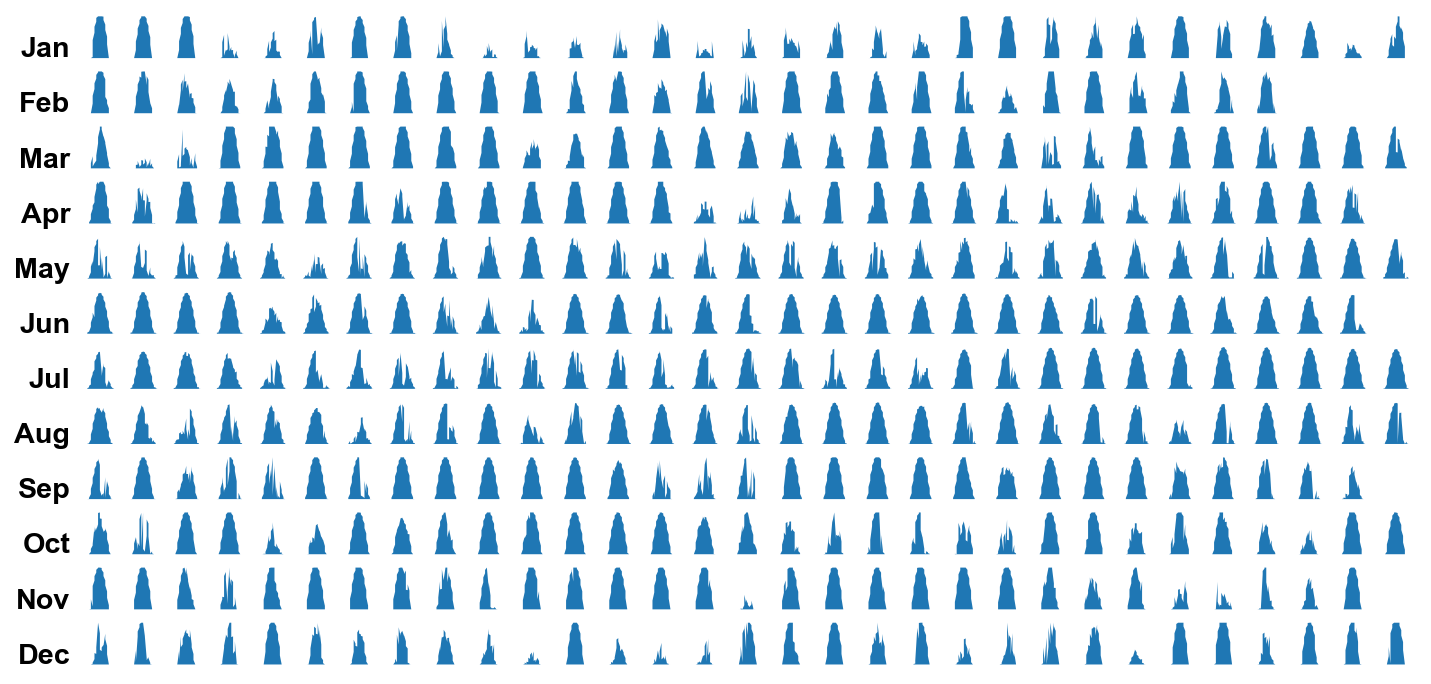

In [14]:
### All-in-one, including visualization
### Will use pvvm.io.queryNSRDBfile() if filepathdoesn't exist
### Note that for a lat/lon query, latitude should come first in string
plt.close()
pvvm.plots.plotyearbymonth(
    pvvm.model.PVsystem('fixed').sim('40, -110', 2015, query=True))
plt.show()

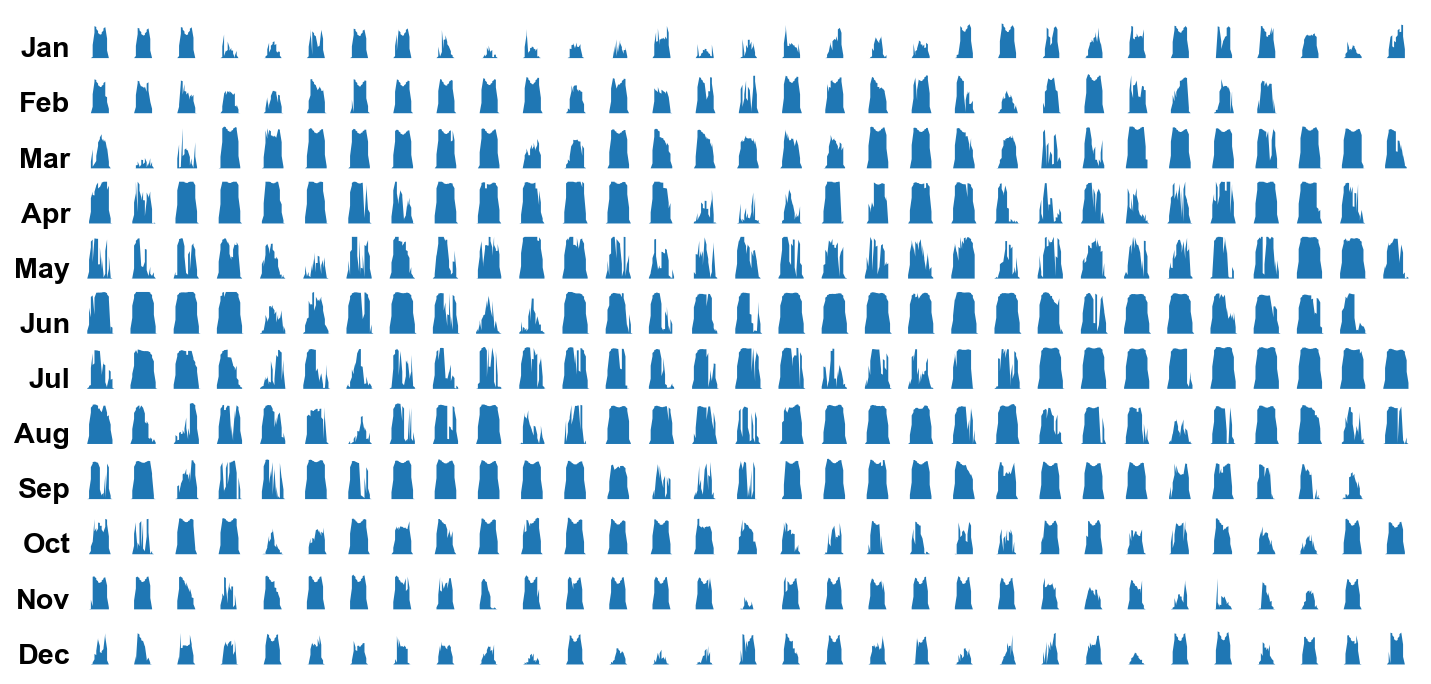

In [15]:
plt.close()
pvvm.plots.plotyearbymonth(
    pvvm.model.PVsystem('track').sim('40, -110', 2015, query=True))
plt.show()

/Users/patrickbrown/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  


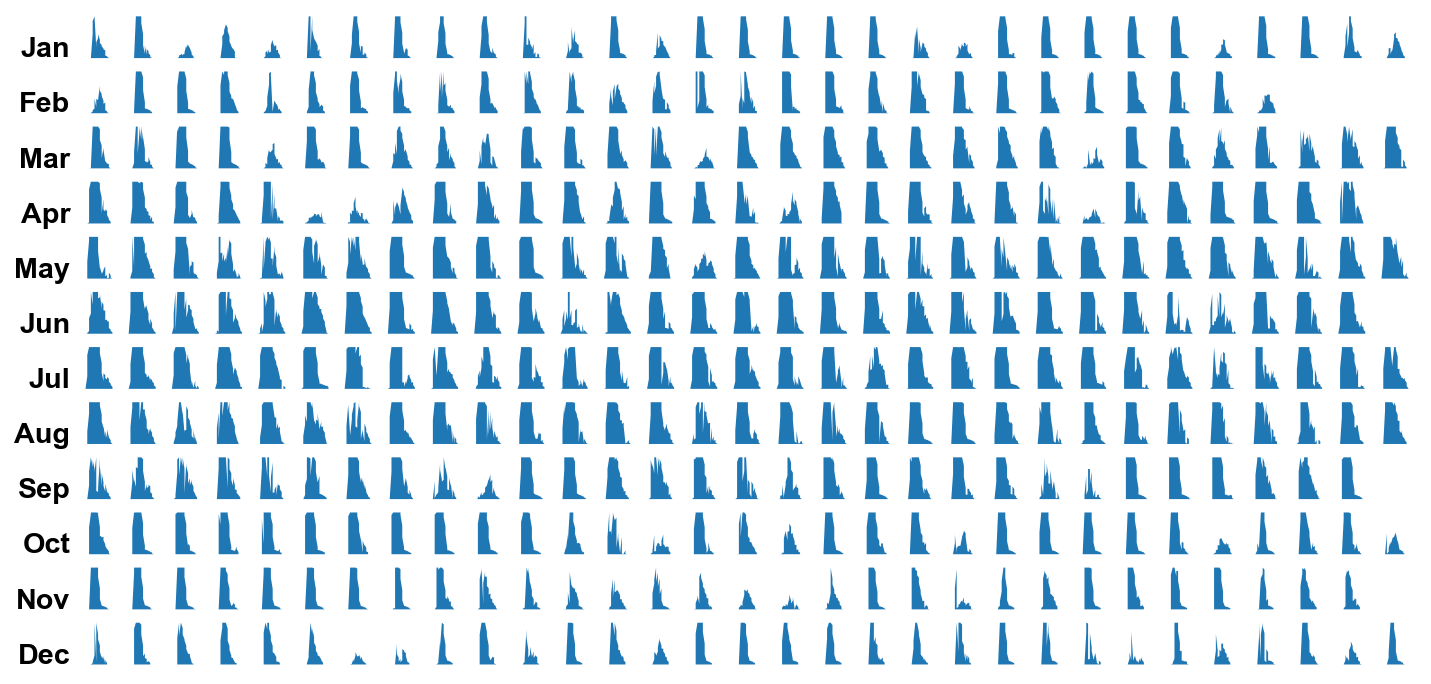

In [9]:
### All-in-one, including visualization; here modifying the array orientation
plt.close()
pvvm.plots.plotyearbymonth(
    pvvm.model.PVsystem(
        'fixed', axis_tilt=60, axis_azimuth=90, dcac=2.5,
    ).sim('Boulder, CO', 2007, query=True))
plt.show()

In [10]:
### Query NSRDB directly, without googlemaps
df, filename = pvvm.data.downloadNSRDBfile(
    lat=40, lon=-100, year=2001, 
    filepath=os.path.expanduser('~/Desktop/'),
    nodename='default', filetype='.csv',
    attributes='ghi,dni,dhi,solar_zenith_angle,air_temperature,wind_speed',
    leap_day='true', interval='30', utc='false', psmversion=3,
    write=True, return_savename=True, urlonly=False
)

/Users/patrickbrown/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3214: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [11]:
print(filename)
df.head()

/Users/patrickbrown/Desktop/615933_40.01_-100.02_2001.csv


,Source,Location ID,City,State,Country,Latitude,Longitude,Time Zone,Elevation,Local Time Zone,Clearsky DHI Units,Clearsky DNI Units,Clearsky GHI Units,Dew Point Units,DHI Units,DNI Units,GHI Units,Solar Zenith Angle Units,Temperature Units,Pressure Units,Relative Humidity Units,Precipitable Water Units,Wind Direction Units,Wind Speed,Cloud Type -15,Cloud Type 0,Cloud Type 1,Cloud Type 2,Cloud Type 3,Cloud Type 4,Cloud Type 5,Cloud Type 6,Cloud Type 7,Cloud Type 8,Cloud Type 9,Cloud Type 10,Cloud Type 11,Cloud Type 12,Fill Flag 0,Fill Flag 1,Fill Flag 2,Fill Flag 3,Fill Flag 4,Fill Flag 5,Surface Albedo Units,Version
0,NSRDB,615933,-,-,-,40.01,-100.02,-6,717,-6,w/m2,w/m2,w/m2,c,w/m2,w/m2,w/m2,Degree,c,mbar,%,cm,Degrees,m/s,,Clear,Probably Clear,Fog,Water,Super-Cooled Water,Mixed,Opaque Ice,Cirrus,Overlapping,Overshooting,Unknown,Dust,Smoke,,Missing Image,Low Irradiance,Exceeds Clearsky,Missing CLoud Properties,Rayleigh Violation,,v3.0.1
1,Year,Month,Day,Hour,Minute,GHI,DNI,DHI,Solar Zenith Angle,Temperature,Wind Speed,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,2001,1,1,0,0,0,0,0,160.64000000000001,-11,1.2000000000000002,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,2001,1,1,0,30,0,0,0,162.73,-11,1.4000000000000001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,2001,1,1,1,0,0,0,0,162.63,-12,1.7000000000000002,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [12]:
### Load from directly downloaded file
dfsun, info, tz, elevation = pvvm.io.getNSRDBfile(
    filepath=os.path.expanduser('~/Desktop/'),
    filename=os.path.basename(filename), 
    year=2001, resolution=30)
dfsun.sample(3)

,Year,Month,Day,Hour,Minute,GHI,DNI,DHI,Solar Zenith Angle,Temperature,Wind Speed
2001-01-01 22:00:00-06:00,2001,1,1,22,0,0,0,0,141.50,-12,1.5
2001-03-07 13:30:00-06:00,2001,3,7,13,30,624,543,246,45.91,11,2.2
2001-01-14 13:30:00-06:00,2001,1,14,13,30,506,802,128,61.92,2,6.3


# CF-optimized orientation

In [7]:
import pvlib

In [8]:
location = 'Kansas City, MO'
year = 'tmy'
systemtype = 'fixed'
resolutionsun = 60
diffuse_model = 'reindl'

In [9]:
### Get NSRDB input data
dfsun, info, tz, elevation, filename = pvvm.io.queryNSRDBfile(
    location, year, returnfilename=True)

In [10]:
### Pull latitude and longitude from NSRDB file
latitude = float(info['Latitude'])
longitude = float(info['Longitude'])

### Determine solar position
solpos = pvlib.solarposition.get_solarposition(
    dfsun.index, latitude, longitude)

### Set extra parameters for diffuse sky models
if diffuse_model in ['haydavies', 'reindl', 'perez']:
    dni_et = pvlib.irradiance.get_extra_radiation(
        dfsun.index, method='nrel', epoch_year=year)
    airmass = pvlib.atmosphere.get_relative_airmass(
        solpos['apparent_zenith'])
else:
    dni_et = None
    airmass = None

In [11]:
### Optimize orientation for capacity factor
(optcf_orient, optcf_cf, optcf_inputs, optcf_outputs) = pvvm.model.pv_optimize_orientation(
    objective='cf', 
    dfsun=dfsun, info=info, tznode=tz, elevation=elevation,
    solpos=solpos, dni_et=dni_et, airmass=airmass, 
    systemtype=systemtype, yearsun=year, resolutionsun=resolutionsun,
    ranges='default', 
    full_output=True
)
optcf_axis_tilt, optcf_axis_azimuth = optcf_orient[0], optcf_orient[1]

In [12]:
print('{} ({:.1f}° lat, {:.1f}° lon)'.format(location, latitude, longitude))
print('CF-optimized orientation: {:.1f}° tilt, {:.1f}° azimuth'.format(*optcf_orient))

Kansas City, MO (39.1° lat, -94.6° lon)
CF-optimized orientation: 34.7° tilt, 181.5° azimuth


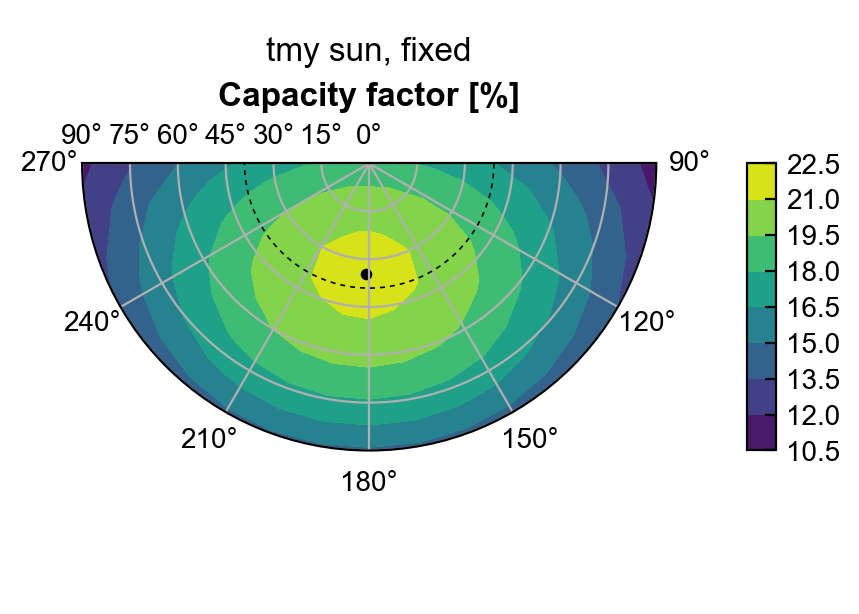

In [13]:
###### Plot it

plt.close()
f, ax = plt.subplots(1, 1, figsize=(6,4), dpi=100,
                     subplot_kw=dict(projection='polar'))

### CF
tilts = optcf_inputs[0]
azimuths = optcf_inputs[1]
revenues = -100*optcf_outputs
opt_tilt = optcf_axis_tilt
opt_azimuth = optcf_axis_azimuth
### Contour
pp = ax.contourf(np.radians(azimuths), tilts, revenues)
### Max point
ax.scatter(np.radians(opt_azimuth), opt_tilt, c='k', s=10)
### Latitude line
ax.plot(np.radians(np.linspace(90,270,100)),
        latitude * np.ones(100),
        c='k', lw=0.6, dashes=[3,3])
### Axis format
ax.set_theta_direction(-1)
ax.set_theta_zero_location('N')
ax.set_thetamin(270)
ax.set_thetamax(90)
ax.set_xticks(np.radians(np.linspace(90, 270, 7)))
ax.set_yticks(np.linspace(0, 90, 7))
ax.set_yticklabels(['{}°'.format(int(i)) for i in np.linspace(0, 90, 7)])
cbar = plt.colorbar(pp, orientation='vertical', shrink=0.5, pad=0.08, aspect=10, ax=ax)
cbar.ax.tick_params(labelsize='medium')
ax.text(0.0*np.pi, 18, 
        s='Capacity factor [%]', 
        fontsize='large', weight='bold',
        horizontalalignment='center')
ax.tick_params(axis='both', pad=5, labelsize='medium')

plt.tight_layout(h_pad=-9)

title = '{} sun, {}'.format(year, systemtype)

ax.text(0.0*np.pi, 32, 
        s=title, 
        fontsize='large', 
        horizontalalignment='center')

plt.show()